In [20]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## 1. Impementing the given image transformation

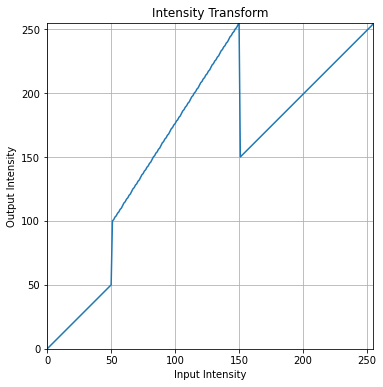

In [18]:
c = np.array([(50,50),(50,100),(150,255),(150,150)])
t1 = np.linspace(0, c[0,1], c[0,0]+1-0).astype('uint8')
# print(t1)
t2 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')
# print(t2)
t3 = np.linspace(c[3,1], 255, 255 - c[3,0]).astype('uint8')
# print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
# print(len(transform))
fig , ax = plt.subplots()
fig.set_size_inches(6,6)
ax.plot(transform)
ax.grid(True)
ax.set_title('Intensity Transform')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('1_transform.png')
plt.show()

In [27]:
img_orig=cv.imread ('images/emma.jpg',cv.IMREAD_GRAYSCALE)
assert img_orig is not None
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig,transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

## 2. Apply point intensity operations to accentuate,

### 2.1 White matter

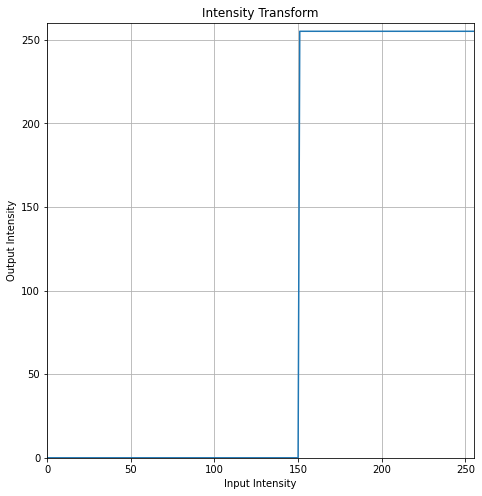

In [47]:
c = np.array([(0,150),(150,255)])
t1 = np.linspace(0, c[0,0], c[0,1]+1-0).astype('uint8')
#print(t1)
t2 = np.linspace(c[1,1], 255, 255 - c[1,0]).astype('uint8')
#print(t2)
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
# print(len(transform))
fig , ax = plt.subplots()
fig.set_size_inches(8,8)
ax.plot(transform)
ax.grid(True)
ax.set_title('Intensity Transform')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,260)
ax.set_aspect('equal')
plt.savefig('2_1_white_matter_transform.png')
plt.show()

In [48]:
img_orig=cv.imread ('images/ss_brain.jpg',cv.IMREAD_GRAYSCALE)
assert img_orig is not None
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig,transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

### 2.2 Gray matter

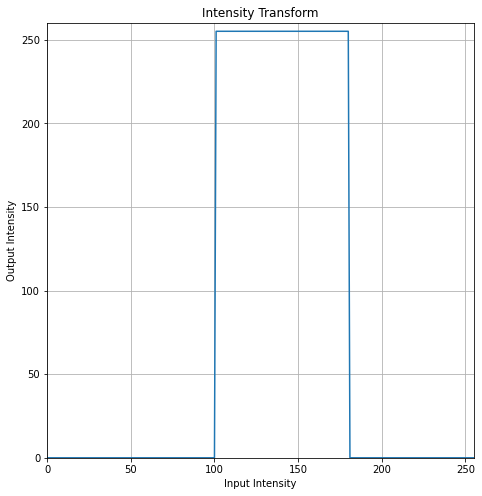

In [53]:
c = np.array([(0,100),(100,255),(180,255)])
t1 = np.linspace(0, c[0,0], c[0,1]+1-0).astype('uint8')
#print(t1)
t2 = np.linspace(c[1,1],c[2,1],c[2,0] - c[1,0] ).astype('uint8')
#print(t2)
t3 = np.linspace(0, 0, 255 - c[2,0]).astype('uint8')
#print(t3)
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
# print(len(transform))
fig , ax = plt.subplots()
fig.set_size_inches(8,8)
ax.plot(transform)
ax.grid(True)
ax.set_title('Intensity Transform')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,260)
ax.set_aspect('equal')
plt.savefig('2_2_gray_matter_transform.png')
plt.show()

In [56]:
img_orig=cv.imread ('images/ss_brain.jpg',cv.IMREAD_GRAYSCALE)
assert img_orig is not None
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig,transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

## 3.

### 3.1 Gamma correction to the L plane

In [57]:
img_orig = cv.imread ('images/ss_gamma_correction.jpg',cv . IMREAD_COLOR)
gamma = 2
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, table)
img_orig = cv.cvtColor(img_orig , cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)
f,axarr = plt.subplots(3,2)
axarr[0,0].imshow(img_orig)
axarr[0,1].imshow(img_gamma)
color=('b','g','r')
for i,c in enumerate(color):
    hist_orig = cv.calcHist([img_orig],[i],None,[256],[0, 256])
    axarr[1,0].plot(hist_orig,color=c)
    hist_gamma = cv.calcHist([img_gamma], [i], None,[256],[0, 256])
    axarr[1,1].plot(hist_gamma , color=c)
    axarr[2,0].plot(table)
    axarr[2,0].set_xlim(0,255)
    axarr[2,0].set_ylim(0,255)
    axarr[2,0].set_aspect('equal')

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\matrix.cpp:749: error: (-215:Assertion failed) m.dims >= 2 in function 'cv::Mat::Mat'
